# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.01, 0.001, 0.0001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
optimizers = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]
opt_index = ['SGD', 'PMSprop', 'Adagrad', 'Adam']

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
count = 0
for lr, opt in itertools.product(LEARNING_RATE, optimizers):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opt(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        
        
        # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
        
        
    exp_name_tag = f"Lr-{lr} Opt-{opt_index[count%4]}"
    results[exp_name_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}
    count += 1



Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 2s 12ms/step - loss: 2.037

196/196 [==============================] - 2s 11ms/step - loss: 1.2247 - accuracy: 0.5704 - val_loss: 1.3779 - val_accuracy: 0.5069
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________

Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7543 - accuracy: 0.3652 - val_loss: 1.8173 - val_accuracy: 0.3340
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__

196/196 [==============================] - 2s 12ms/step - loss: 1.0293 - accuracy: 0.6419 - val_loss: 1.5077 - val_accuracy: 0.4782
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0148 - accuracy: 0.6474 - val_loss: 1.7222 - val_accuracy: 0.4376
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

196/196 [==============================] - 2s 12ms/step - loss: 1.4729 - accuracy: 0.4755 - val_loss: 1.6074 - val_accuracy: 0.4393
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4717 - accuracy: 0.4778 - val_loss: 1.5680 - val_accuracy: 0.4444
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4674 - accuracy: 0.4778 - val_loss: 1.6228 - val_accuracy: 0.4318
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________


Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6659 - accuracy: 0.4187 - val_loss: 1.6727 - val_accuracy: 0.4147
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6622 - accuracy: 0.4214 - val_loss: 1.6738 - val_accuracy: 0.4141
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6588 - accuracy: 0.4224 - val_loss: 1.6666 - val_accuracy: 0.4141
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 0.8114 - accuracy: 0.7070 - val_loss: 2.2463 - val_accuracy: 0.4475
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8024 - accuracy: 0.7102 - val_loss: 2.0577 - val_accuracy: 0.4708
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7910 - accuracy: 0.7176 - val_loss: 1.9712 - val_accuracy: 0.4823
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7788 - accuracy: 0.7209 - val_loss: 1.9820 - val_accuracy: 0.4961
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________________

Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5217 - accuracy: 0.4684 - val_loss: 1.5443 - val_accuracy: 0.4609
Epoch 48/50
196/196 [==============================] - 2s 13ms/step - loss: 1.5182 - accuracy: 0.4703 - val_loss: 1.5488 - val_accuracy: 0.4571
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5138 - accuracy: 0.4720 - val_loss: 1.5572 - val_accuracy: 0.4557
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5106 - accuracy: 0.4729 - val_loss: 1.5381 - val_accuracy: 0.4622
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________________________________________

196/196 [==============================] - 2s 12ms/step - loss: 0.7039 - accuracy: 0.7476 - val_loss: 1.6675 - val_accuracy: 0.5218
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6892 - accuracy: 0.7550 - val_loss: 1.6955 - val_accuracy: 0.5216
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6832 - accuracy: 0.7550 - val_loss: 1.7163 - val_accuracy: 0.5232
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6639 - accuracy: 0.7641 - val_loss: 1.7278 - val_accuracy: 0.5175
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6521 - accuracy: 0.7662 - val_loss: 1.7270 - val_accuracy: 0.5152
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________________________

Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 2.0257 - accuracy: 0.3052 - val_loss: 2.0254 - val_accuracy: 0.3074
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 2.0221 - accuracy: 0.3059 - val_loss: 2.0219 - val_accuracy: 0.3088
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 2.0186 - accuracy: 0.3073 - val_loss: 2.0184 - val_accuracy: 0.3087
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 2.0152 - accuracy: 0.3084 - val_loss: 2.0151 - val_accuracy: 0.3105
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0118 - accuracy: 0.3095 - val_loss: 2.0118 - val_accuracy: 0.3111
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.0036 - accuracy: 0.6510 - val_loss: 1.4347 - val_accuracy: 0.5105
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9971 - accuracy: 0.6530 - val_loss: 1.3856 - val_accuracy: 0.5212
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9841 - accuracy: 0.6571 - val_loss: 1.3724 - val_accuracy: 0.5248
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9767 - accuracy: 0.6624 - val_loss: 1.5177 - val_accuracy: 0.4829
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9659 - accuracy: 0.6620 - val_loss: 1.4016 - val_accuracy: 0.5177
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9541 - accuracy: 0.6691 - val_loss: 1.4279 - val_accuracy: 0.5222
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 O

Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8956 - accuracy: 0.3426 - val_loss: 1.8967 - val_accuracy: 0.3406
Epoch 46/50
196/196 [==============================] - 2s 13ms/step - loss: 1.8926 - accuracy: 0.3437 - val_loss: 1.8937 - val_accuracy: 0.3409
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8897 - accuracy: 0.3445 - val_loss: 1.8909 - val_accuracy: 0.3427
Epoch 48/50
196/196 [==============================] - 2s 13ms/step - loss: 1.8868 - accuracy: 0.3456 - val_loss: 1.8880 - val_accuracy: 0.3405
Epoch 49/50
196/196 [==============================] - 2s 13ms/step - loss: 1.8840 - accuracy: 0.3456 - val_loss: 1.8853 - val_accuracy: 0.3424
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8813 - accuracy: 0.3471 - val_loss: 1.8828 - val_accuracy: 0.3443
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)      

196/196 [==============================] - 2s 12ms/step - loss: 0.8765 - accuracy: 0.6978 - val_loss: 1.3293 - val_accuracy: 0.5485
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8704 - accuracy: 0.6991 - val_loss: 1.3552 - val_accuracy: 0.5403
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8507 - accuracy: 0.7075 - val_loss: 1.3252 - val_accuracy: 0.5481
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8514 - accuracy: 0.7070 - val_loss: 1.3733 - val_accuracy: 0.5306
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8378 - accuracy: 0.7113 - val_loss: 1.3554 - val_accuracy: 0.5413
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8266 - accuracy: 0.7156 - val_loss: 1.3403 - val_accuracy: 0.5514
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8120 - accuracy: 0.7222 - val_loss: 1.3674 - val_accuracy: 0.5458


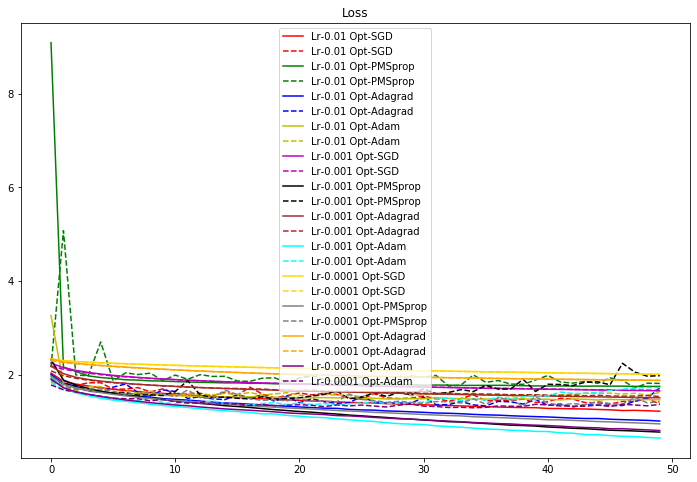

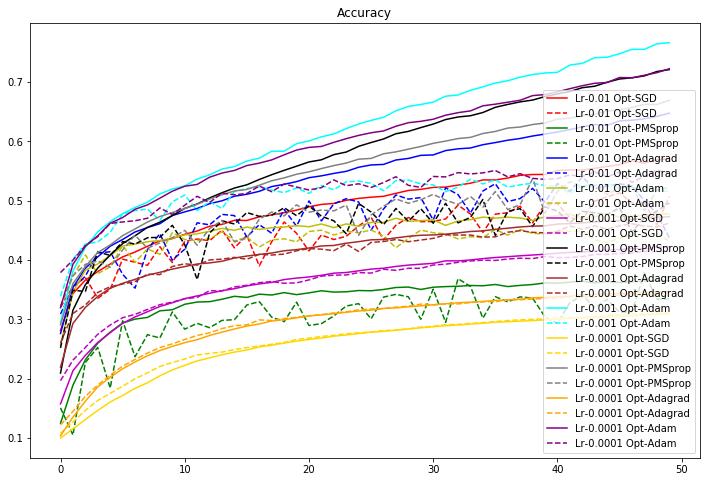

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k" ,'brown', 'cyan', 'gold', 'gray', 'orange', 'purple']

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()